In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#data collection
diabetes_dataset = pd.read_csv('diabetes.csv')

In [35]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# rows and column number
diabetes_dataset.shape

(768, 9)

In [37]:
#statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
#dibatic and no diabatic
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
import seaborn as sns

<AxesSubplot:xlabel='Outcome', ylabel='count'>

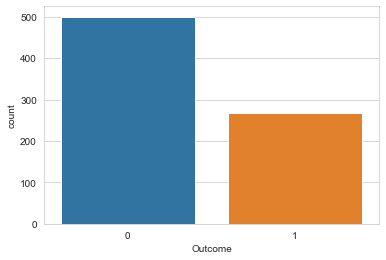

In [40]:
#do a counterplot on outcome
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=diabetes_dataset)

In [41]:
## Checking missing entries in the dataset columnwise
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


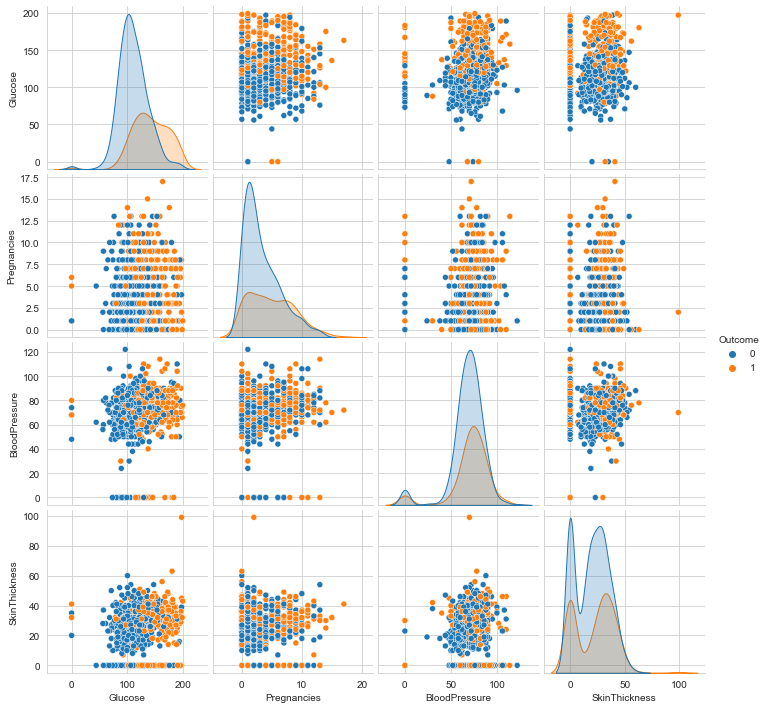

In [53]:
sns.pairplot(diabetes_dataset, hue = 'Outcome', vars = ['Glucose','Pregnancies','BloodPressure','SkinThickness'])

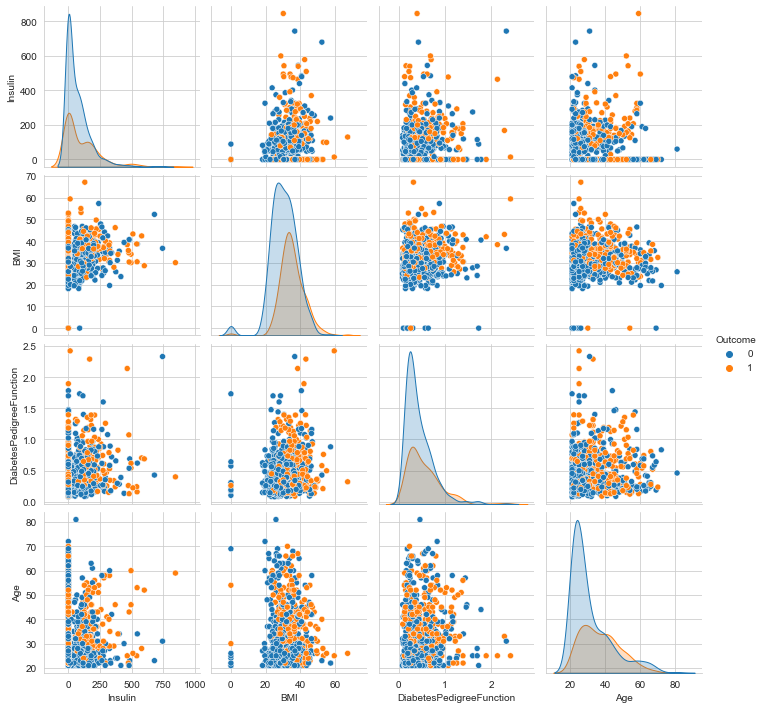

In [54]:
sns.pairplot(diabetes_dataset, hue = 'Outcome', vars = ['Insulin','BMI','DiabetesPedigreeFunction','Age'])

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

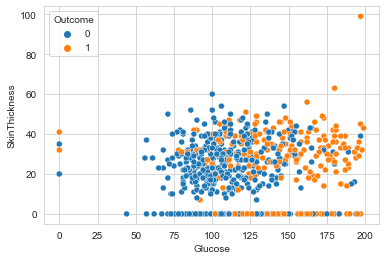

In [56]:
sns.scatterplot(x = 'Glucose', y = 'SkinThickness', hue = 'Outcome', data = diabetes_dataset)

<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

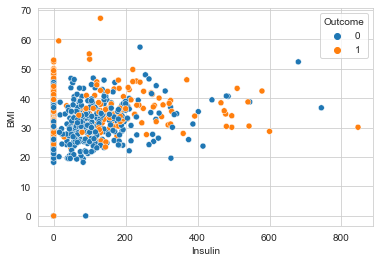

In [57]:
sns.scatterplot(x = 'Insulin', y = 'BMI', hue = 'Outcome', data = diabetes_dataset)

<AxesSubplot:xlabel='Insulin', ylabel='Age'>

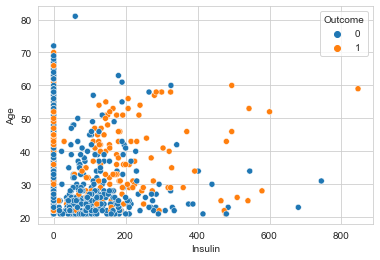

In [58]:
sns.scatterplot(x = 'Insulin', y = 'Age', hue = 'Outcome', data = diabetes_dataset)

In [60]:
dt_numeric = diabetes_dataset[['Age','Insulin','BMI','SkinThickness','Glucose']]

In [61]:
dt_numeric.head()

,Age,Insulin,BMI,SkinThickness,Glucose
0,50,0,33.6,35,148
1,31,0,26.6,29,85
2,32,0,23.3,0,183
3,21,94,28.1,23,89
4,33,168,43.1,35,137


In [62]:
from scipy import stats

# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.4259954  0.69289057 0.20401277 0.90726993 0.84832379]
 [0.19067191 0.69289057 0.68442195 0.53090156 1.12339636]
 [0.10558415 0.69289057 1.10325546 1.28821221 1.94372388]
 ...
 [0.27575966 0.27959377 0.73518964 0.15453319 0.00330087]
 [1.17073215 0.69289057 0.24020459 1.28821221 0.1597866 ]
 [0.87137393 0.69289057 0.20212881 0.65635768 0.8730192 ]]


In [63]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  8,   9,  13,  49,  60,  75,  81, 111, 123, 145, 153, 177, 182,
       186, 220, 228, 247, 286, 342, 349, 370, 371, 409, 415, 426, 445,
       453, 459, 486, 494, 502, 522, 579, 584, 645, 655, 666, 673, 684,
       684, 695, 706, 753], dtype=int64), array([1, 2, 1, 2, 2, 4, 2, 1, 0, 2, 1, 2, 4, 1, 1, 1, 1, 1, 4, 4, 1, 2,
       1, 1, 2, 2, 0, 0, 1, 2, 4, 2, 3, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1],
      dtype=int64))


In [65]:
#filtering outliers retaining only those data points which are below threshhold
diabetes_dataset = diabetes_dataset[(z < 3).all(axis=1)]

In [67]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
diabetes_dataset.shape

(726, 9)

In [71]:
# segregating dataset into features i.e., X and target variables i.e., y
X = diabetes_dataset.drop(['Outcome'],axis=1)
y = diabetes_dataset['Outcome']

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

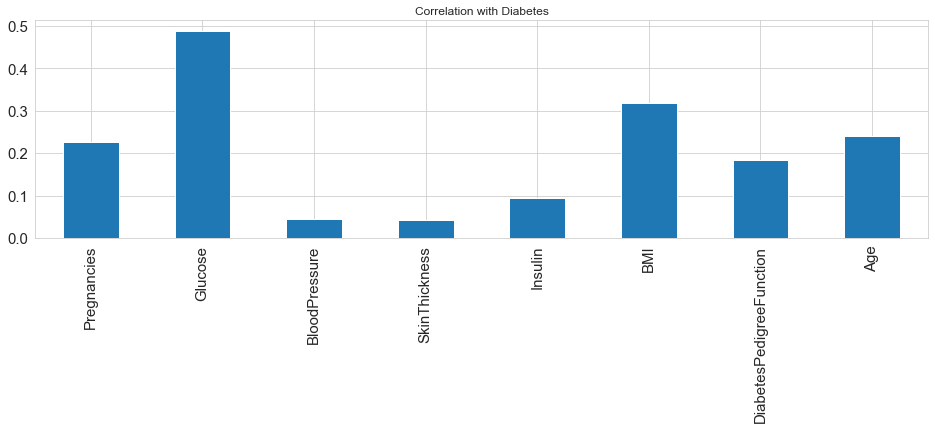

In [72]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

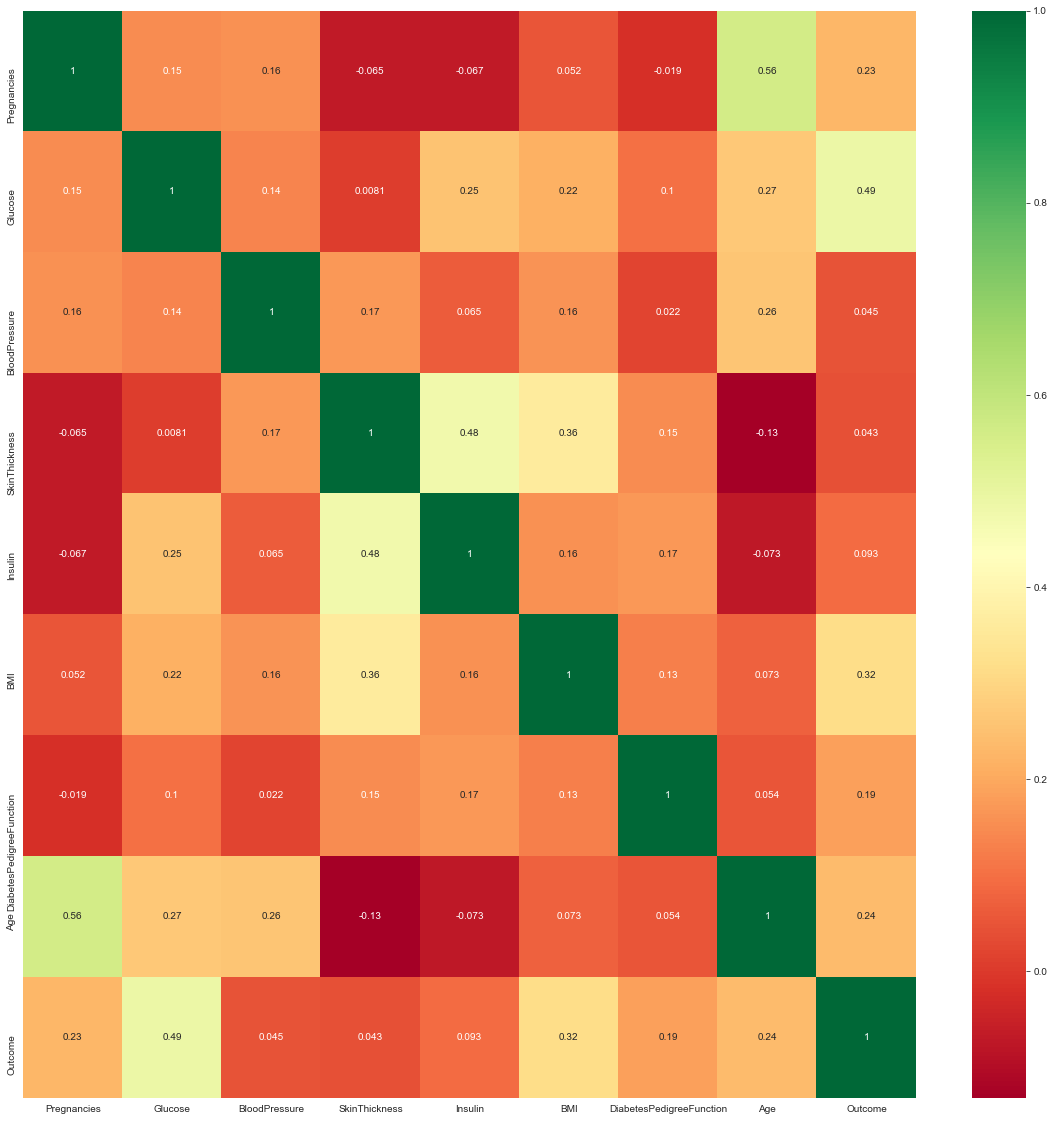

In [74]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = diabetes_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(diabetes_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")